# HW 2

## Use AAPL.csv file and answer the following questions:

Create 5 different series based on AAPL.cvs file's column 'Open', 'Close', 'High', 'Low', 'Volume' and name the series accordingly.

In [4]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

/var/folders/hq/ntmy39j97gg970yt9lhmn62m0000gn/T/ipykernel_24873/1361444348.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)


In [6]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [7]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-07,224.50,225.69,221.33,221.690,39505354
2024-10-08,224.30,225.98,223.25,225.770,31855693
2024-10-09,225.23,229.75,224.83,229.540,33591091
2024-10-10,227.78,229.50,227.17,229.040,28183544
2024-10-11,229.30,229.41,227.34,228.355,8712492


## Q1

### Q1.1, How many trading days this data set cover? (fill in the number in Camino)

In [10]:
len(data)

11050

Or ..

In [12]:
len(stock_o)

11050

### Q1.2, What's the open price at 2020-08-28? (choose the closest price in Camino)

In [14]:
stock_o['2020-08-28']

126.012497

### Q1.3, What's the average closing price in 2018 first quarter (2018-01-01 to 2018-03-31)? (choose the closest price in Camino)

In [16]:
stock_c['2018-01-01':'2018-03-31'].mean()

43.04782798360656

### Q1.4, Based on day high and day low, find the top 5 dates with the biggest value change within 1 trading day. Sort them based on value change, highest on top. (choose the 1st date in Camino)

In [18]:
(stock_h - stock_l).sort_values(ascending=False).head(5)

Date
2024-08-05    17.500000
2024-06-11    13.530000
2024-06-12    13.300000
2020-09-04    12.809998
2020-09-02    10.979996
dtype: float64

### Q1.5, Plot the closing price vs date graph. pick the command that you use to plot the graph in Camino

<Axes: xlabel='Date'>

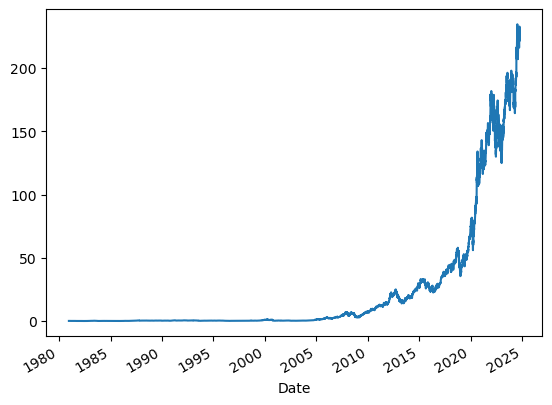

In [20]:
stock_c.plot()

### Q1.6, Plot the closing price vs date graph from the beginning of 2020 till most recent date. Do not use hard-coded date for the most recent date.  (Copy and paste how you use the .plot() command into Quiz. Instructor will grade this manually)

<Axes: xlabel='Date'>

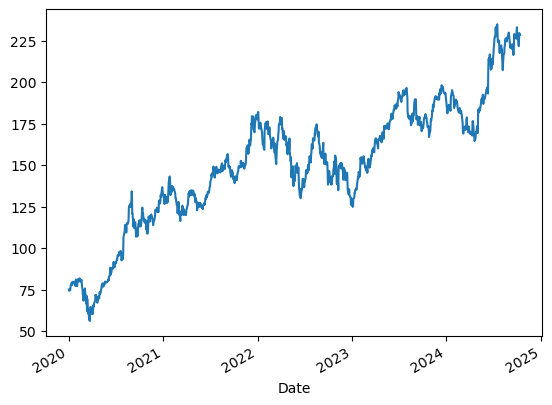

In [22]:
stock_c['2020-01-01':].plot()

Or..

<Axes: xlabel='Date'>

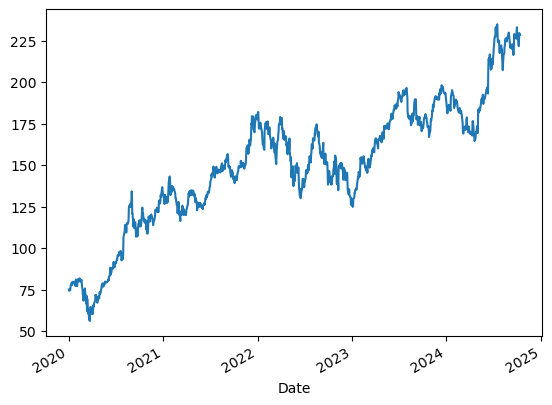

In [24]:
stock_c.loc['2020-01-01':].plot()

## Q2

### Q2.1, Total how many trading days the stock price close at above 50 dollars ? (fill in the number in Camino)

In [27]:
len(stock_c[stock_c > 50])

1418

### Q2.2, When is the first time this stock close at more than 50 dollars? Show the date only. (choose the right date in Camino)

In [29]:
stock_c[stock_c > 50].head(1).index[0]

Timestamp('2018-08-01 00:00:00')

### Q2.3, Within the dates with price close at more than 50 dollars, find out how many days the trading volume is higher than 100 million shares(100,000,000). (choose the right number in Camino)

In [31]:
stock_over_50 = stock_c[stock_c > 50]

In [32]:
len(stock_over_50[stock_v[stock_over_50.index] > 100000000])

486

Or ..

In [34]:
(stock_v[stock_over_50.index] > 100000000).sum()

486

## Q3

### Q3.1, For dates with price close at more than 45 dollars, how many days are before 2018-05-10 ? Show the date and stock price.  (choose the number of days in Camino)

In [37]:
stock_over_45 = stock_c[stock_c > 45]

In [38]:
stock_over_45[stock_over_45.index < '2018-05-10']

Date
2018-03-12    45.430000
2018-05-04    45.957500
2018-05-07    46.290001
2018-05-08    46.512501
2018-05-09    46.840000
Name: Close, dtype: float64

In [39]:
len(stock_over_45[stock_over_45.index < '2018-05-10'])

5

### Q3.2, Show the top 5 trading volume(date and volume) for stock closing price over 100 dollars. (choose the largest volume date in Camino)

In [41]:
stock_over_100 = stock_c[stock_c > 100]

In [42]:
stock_v[stock_over_100.index].nlargest(5)

Date
2020-07-31    374336800
2020-08-24    345937600
2020-08-21    338054800
2020-09-04    332607200
2024-09-20    318679888
Name: Volume, dtype: int64

### Q3.3, Based on top 5 trading volume dates for stock closing price over 100 dollars, find the matching closing price and sort them based on price, highest one on top. (choose the first date in Camino)

In [44]:
trading_v_top5_index=stock_v[stock_over_100.index].nlargest(5).index
trading_v_top5_index

DatetimeIndex(['2020-07-31', '2020-08-24', '2020-08-21', '2020-09-04',
               '2024-09-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [45]:
stock_c[trading_v_top5_index].sort_values(ascending=False)

Date
2024-09-20    228.200000
2020-08-24    125.857498
2020-08-21    124.370003
2020-09-04    120.959999
2020-07-31    106.260002
Name: Close, dtype: float64

### Q3.4, Based on top 5 trading volume dates for stock closing price over 100 dollars, which date it gains the most money per share? Assuming buy at open and sell at close. (choose the date in Camino)

In [47]:
stock_c[trading_v_top5_index]-stock_o[trading_v_top5_index]

Date
2020-07-31    3.375000
2020-08-24   -2.839997
2020-08-21    5.107506
2020-09-04    0.889999
2024-09-20   -1.770000
dtype: float64

In [48]:
(stock_c[trading_v_top5_index]-stock_o[trading_v_top5_index]).nlargest(1)

Date
2020-08-21    5.107506
dtype: float64

Or..

In [50]:
(stock_c[trading_v_top5_index]-stock_o[trading_v_top5_index]).idxmax()

Timestamp('2020-08-21 00:00:00')